# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [541]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [508]:
# Checking the number of mice
mice_count = mouse_df['Mouse ID'].nunique()
mice_count

249

In [509]:
# Our data should be uniquely identified by Mouse ID and Timepoint array   

duplicated = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [510]:
# Optional: Get all the data for the duplicate mouse ID.

data_g989 = mouse_df[mouse_df['Mouse ID'] == 'g989']
data_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [511]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = pd.DataFrame(mouse_df.drop(mouse_df[(mouse_df['Mouse ID'] == 'g989')].index))
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [512]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [513]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


tumor_mean = df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(level=0).mean()
tumor_median = df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(level=0).median()
tumor_var = df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(level=0).var()
tumor_std = df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(level=0).std()
tumor_sem = df.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(level=0).sem()

data = [tumor_mean,tumor_median,tumor_var,tumor_std,tumor_sem]
headers = ['Mean Tumor Volume',	'Median Tumor Volume',	'Tumor Volume Variance',	'Tumor Volume Std. Dev.',	'Tumor Volume Std. Err.']

tumor_data = pd.DataFrame(data).T
tumor_data.columns = headers



tumor_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [514]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


df.reset_index(drop=True, inplace=True)
da = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])

da

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

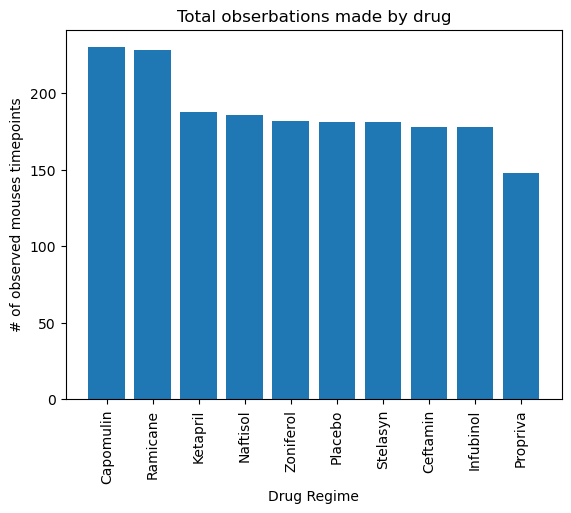

In [515]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Creates the list for the name of each bar
names = df['Drug Regimen'].unique()

#counts the ammount of names of drug regimen, then it creates a list fot those numners
names_count = df['Drug Regimen'].nunique()
names_count = np.arange(0,names_count,1,int)  


#Get the max value for the data set
observed = df.set_index(['Drug Regimen'])['Mouse ID'].groupby(level=0).size()
observed_max = observed.max()
observed_max

#orders the observed mices by sample
ordered_observed = observed.sort_values(ascending=False)



#it gets the sorted list of drugs 
drugs = ordered_observed.index.values.tolist()

#it creates the list of observations
observations  = ordered_observed.tolist()

#print(drugs)
#print(observations)


#Creates the bar chart
bar1 = plt.bar(drugs,observations)
bar1 = plt.xticks(rotation=90)

#Set tittles to the bar chart
bar1 = plt.title('Total obserbations made by drug')
bar1 = plt.xlabel('Drug Regime')
bar1 = plt.ylabel('# of observed mouses timepoints')


plt.show(bar1)


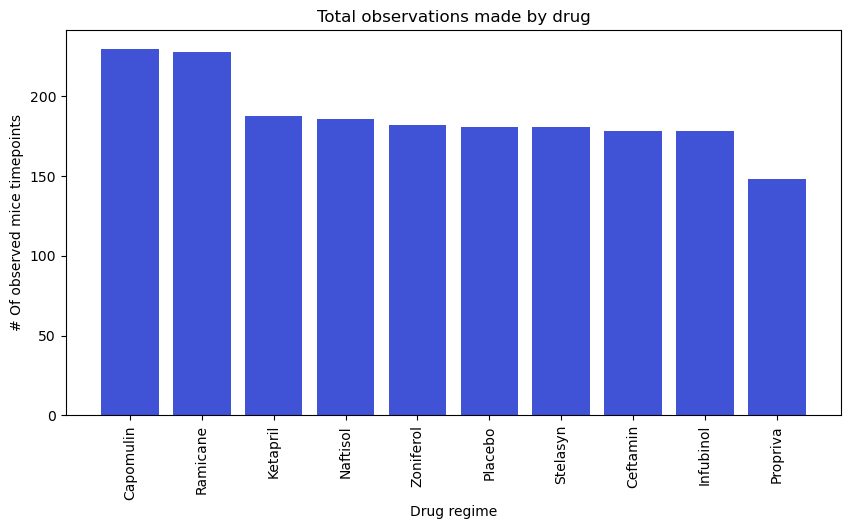

In [289]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Group by 'Drug Regimen' and count the number of 'Mouse ID'
observed = df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

# Create the bar chart using pyplot
plt.figure(figsize=(10, 5))
plt.bar(observed.index, observed.values, color='#4052d6')

# Set titles and labels
plt.title('Total observations made by drug')
plt.xlabel('Drug regime')
plt.ylabel('# Of observed mice timepoints')
plt.xticks(rotation=90)

plt.show()



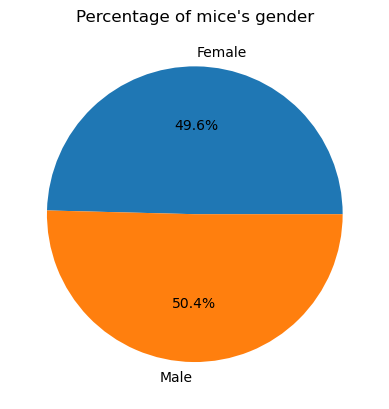

In [516]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

sex = df.set_index(["Sex"])["Mouse ID"].groupby(level=0).nunique()


pie1 = plt.pie(sex.values, labels = sex.index, autopct= '%1.1f%%')
bar1 = plt.title('Total obserbations made by drug')
bar1 = plt.title("Percentage of mice's gender")



plt.show(pie1)

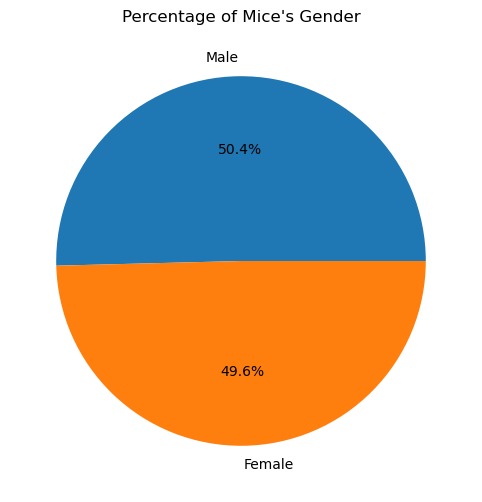

In [314]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Count unique Mouse IDs by gender
unique_mouse_ids = {}
for mouse_id, sex in zip(df['Mouse ID'], df['Sex']):
    if sex not in unique_mouse_ids:
        unique_mouse_ids[sex] = set()
    unique_mouse_ids[sex].add(mouse_id)

# Calculate the counts for the pie chart
sex_labels = list(unique_mouse_ids.keys())
sex_counts = [len(unique_mouse_ids[sex]) for sex in sex_labels]

# Generate a pie chart using only PyPlot
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%')
plt.title("Percentage of Mice's Gender")

# Show the pie chart
plt.show()


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [517]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_time_Capomulin_row = df[df['Drug Regimen'] == 'Capomulin']['Timepoint'].idxmax()
max_time_Ramicane_row = df[df['Drug Regimen'] == 'Ramicane']['Timepoint'].idxmax()
max_time_Infubinol_row = df[df['Drug Regimen'] == 'Infubinol']['Timepoint'].idxmax()
max_time_Ceftamin_row = df[df['Drug Regimen'] == 'Ceftamin']['Timepoint'].idxmax()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_date_size_Capomulin = df.loc[max_time_Capomulin_row]
max_date_size_Ramicane = df.loc[max_time_Ramicane_row]
max_date_size_Infubinol = df.loc[max_time_Infubinol_row]
max_date_size_Ceftamin = df.loc[max_time_Ceftamin_row]


max_date_sizes = pd.DataFrame([max_date_size_Capomulin,max_date_size_Ramicane,max_date_size_Infubinol,max_date_size_Ceftamin])


max_date_sizes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1751,b128,Capomulin,Female,9,22,45,38.982878,2
1750,n364,Ramicane,Male,4,17,45,31.095335,1
1766,y163,Infubinol,Female,17,27,45,67.685569,3
1752,l661,Ceftamin,Male,18,26,45,59.851956,3


In [518]:
# Put treatments into a list  for loop (and later for plot labels)

treatments = []
treatments = max_date_sizes['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes

for i in treatments:
      b = df.loc[df['Drug Regimen'] == i, 'Tumor Volume (mm3)']
      mean = b.mean()
      q1 = b.quantile(.25)
      q3 = b.quantile(.75)
      iqr = q3 - q1
      lowbound = q1 - (iqr*1.5)
      upperbound = q3 + (iqr*1.5)
      outlayersb = b[(b < lowbound) | (b > upperbound)].count()
      for j in b:
         if j < lowbound or j > upperbound:
          outlayers = outlayers +1
      print( str(i) + ' has a lower bound of = ' + str(lowbound) + ' and an upper bound of = '+ str(upperbound) + ' in total there are '+ str(outlayersb) + ' outlayers')
      



Capomulin has a lower bound of = 26.714832162499995 and an upper bound of = 55.9711007025 in total there are 2 outlayers
Ramicane has a lower bound of = 24.1865864625 and an upper bound of = 57.488048122500004 in total there are 1 outlayers
Infubinol has a lower bound of = 32.309217298749985 and an upper bound of = 72.31757996875001 in total there are 0 outlayers
Ceftamin has a lower bound of = 32.81891142624998 and an upper bound of = 71.19095325625001 in total there are 0 outlayers


{'whiskers': [<matplotlib.lines.Line2D at 0x169ac3f20>,
 'caps': [<matplotlib.lines.Line2D at 0x16a16f170>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a16f710>,
 'medians': [<matplotlib.lines.Line2D at 0x16a16cc20>,
 'fliers': [<matplotlib.lines.Line2D at 0x16a16d610>,
 'means': []}

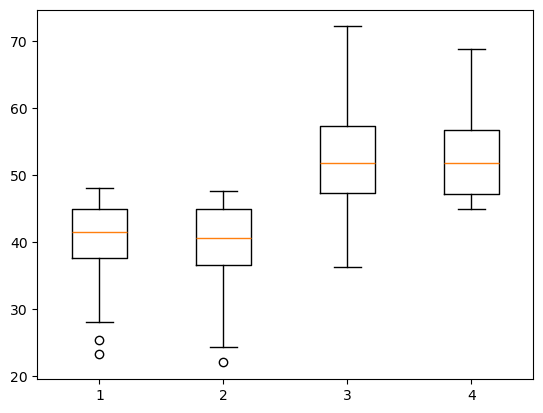

In [519]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

Capomulin = df.loc[df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
Ramicane= df.loc[df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol= df.loc[df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin= df.loc[df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

x = [Capomulin,Ramicane,Infubinol,Ceftamin]

plt.boxplot(x)

## Line and Scatter Plots

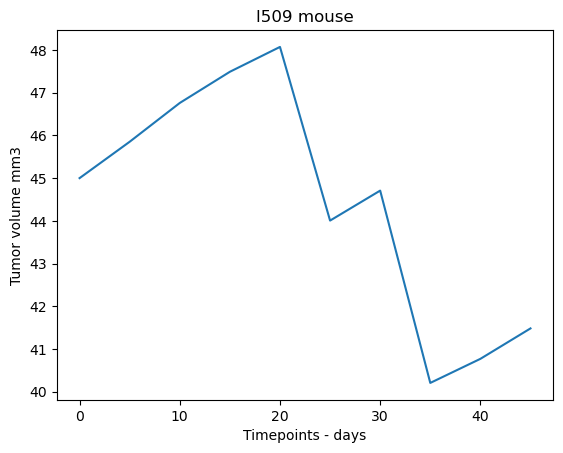

In [535]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
 

single = df.loc[df['Mouse ID'] == 'l509', ['Tumor Volume (mm3)','Timepoint']]

single.head()

line = plt.xlabel("Timepoints - days")
line = plt.title("l509 mouse")
line = plt.ylabel("Tumor volume mm3")
line = plt.plot(single['Timepoint'], single['Tumor Volume (mm3)'])  


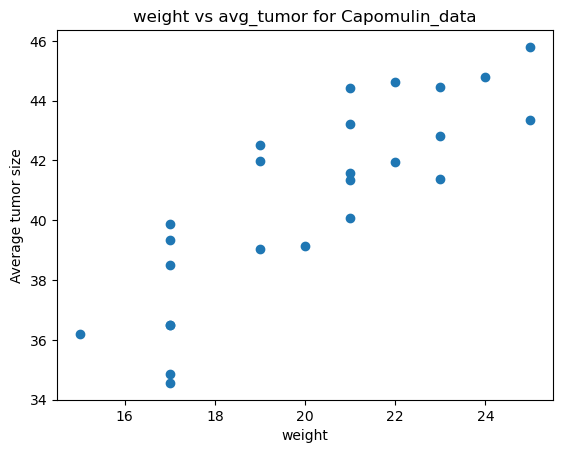

In [540]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_data = df.loc[df['Drug Regimen'] == 'Capomulin',]
Capomulin_data


weight = Capomulin_data.set_index(["Mouse ID"])["Weight (g)"].groupby(level=0).mean()
avg_tumor = Capomulin_data.set_index(["Mouse ID"])['Tumor Volume (mm3)'].groupby(level=0).mean()


scat = plt.scatter(weight, avg_tumor)
scat = plt.xlabel("weight")
scat = plt.title("weight vs avg_tumor for Capomulin_data")
scat = plt.ylabel("Average tumor size")

plt.show(scat)

## Correlation and Regression

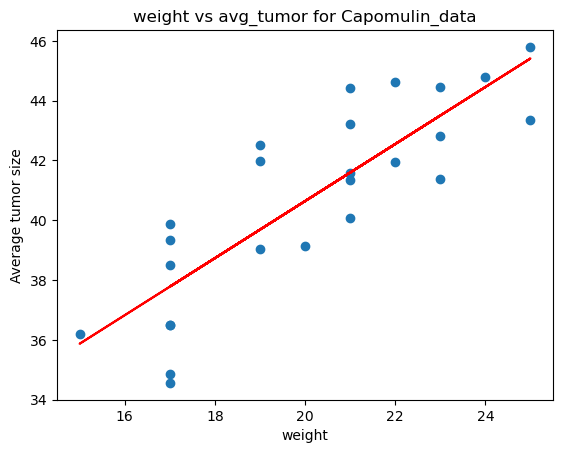

In [544]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, avg_tumor)

# Create a line based on the linear regression
line = slope * weight + intercept

# Plot the regression line
scat = plt.scatter(weight, avg_tumor)
scat = plt.xlabel("weight")
scat = plt.title("weight vs avg_tumor for Capomulin_data")
scat = plt.ylabel("Average tumor size")
scat = plt.plot(weight, line, color='red', label='Regression Line')

plt.show(scat)